 # Exploratory Data Analysis of Boston Housing Set

## Import the Data Set
To import the data set:
- Import Pandas
- Import the CSV using the pd.read_csv() function

In addition to this, Matplotlib will also be imported.  This will be needed to visualise the data during this investigation.

In [84]:
import pandas as pd

import matplotlib as plt
%matplotlib notebook

df = pd.read_csv('boston-housing/test.csv')


## Understand the Physical Characteristics of the Data Set
The head() function can be used to display the first few rows of data

In [29]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


The info() function can be used to understand the data types, number of records, and number of null values.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
ID         173 non-null int64
crim       173 non-null float64
zn         173 non-null float64
indus      173 non-null float64
chas       173 non-null int64
nox        173 non-null float64
rm         173 non-null float64
age        173 non-null float64
dis        173 non-null float64
rad        173 non-null int64
tax        173 non-null int64
ptratio    173 non-null float64
black      173 non-null float64
lstat      173 non-null float64
dtypes: float64(10), int64(4)
memory usage: 19.0 KB


Fromt the above, we can conclude that:
- There are 173 entries in total
- All values are numeric
- There are no null values

## Understand the Statistical Characteristics of the Data Set

A simple way to understand the key descriptive statistics of each variable is to use the describe() function.  This provides:
- **Count**: Total number of records in the data set.
- **Mean**: A measure of centrality of the data set.  It is calculated by summing the values across the sample set, and dividing by the number of values in that sample set.  The mean must be treated carefully as it can be influenced by outliers.  
- **Standard Deviation**: A measure of dispersion based on the distance of each datapoint from the mean.
- **Min, Max**: The minimum and maximum value within the data set for a particular variable.  
- **Median (50%)**: The middle value within the ordered data set for each variable.  This is also a measure of centrality.  It is less sensitive to outliers, so should be considered alongside the mean.
- **Lower Quartile (25%)**: The middle number between the smallest value in the dataset, and the median.
- **Upper Quartile (75%)**: The middle number between the median and the highest value in the dataset.

In [31]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


As well as using the describe function, it is also possible to find measures of centrality or dispersion of individual variables.  For example:

In [32]:
df['age'].mean()

69.24566473988438

In [33]:
df['crim'].median()

0.25199

In [34]:
df['nox'].std()

0.11782641861959928

### Key Features of the Data

To be completed....

## High Crime Rate v Low Crime Rate: What Difference Does it Make?

In the following section, this data set will be split into two subsets:
- Areas with a crime rate greater or equal to 3.7 per capita (NB: This represesnts the 25% of areas with the highest crime rate).
- Areas with a crime rate lower than 3.7%.

To achieve this split, the loc() methods can be used:

In [35]:
df_high_crime_rate = df.loc[df["crim"] >= 3.7]

In [36]:
df_low_crime_rate = df.loc[df["crim"] < 3.7]

With the data split into two subsets, based on crime rate, it is now possible to compare key measures of centrality and dispersion.  This will indicate whether there are any possible differences in the characteristics of one subset, versus another, and suggest further areas for investigation/analysis.

### Do areas with a high crime rate have smaller properties?

To investigate this question, we will compare the mean, median, min and max number of rooms per property of each data subset:

In [52]:
print("Areas with a High Crime Rate:")
print("Mean:") 
print(df_high_crime_rate['rm'].mean())
print("Median:")
print(df_high_crime_rate['rm'].median())
print("Min:")
print(df_high_crime_rate['rm'].min())
print("Max:")
print(df_high_crime_rate['rm'].max())

Areas with a High Crime Rate:
Mean:
6.143209302325582
Median:
6.223
Min:
4.138
Max:
7.313


In [53]:
print("Areas with a Low Crime Rate:")
print("Mean:") 
print(df_low_crime_rate['rm'].mean())
print("Median:")
print(df_low_crime_rate['rm'].median())
print("Min:")
print(df_low_crime_rate['rm'].min())
print("Max:")
print(df_low_crime_rate['rm'].max())

Areas with a Low Crime Rate:
Mean:
6.2844
Median:
6.172000000000001
Min:
5.631
Max:
7.185


These descriptive statistics do not suggest that areas with a low crime rate have significantly more rooms per property than those areas with a high crime rate.  This is suprising, since the number of rooms per property is likely to be an indicator of affluence.  Frequently less affluent areas have higher rates of crime per capita.  

To provide further comparison, the standard deviations of each subset will also be compared: 

In [56]:
print("Areas with a High Crime Rate:")
print("Standard Deviation:") 
print(df_high_crime_rate['rm'].std())
print("  ")
print("Areas with a Low Crime Rate:")
print("Standard Deviation:") 
print(df_low_crime_rate['rm'].std())

Areas with a High Crime Rate:
Standard Deviation:
0.6468388905961027
  
Areas with a Low Crime Rate:
Standard Deviation:
0.5810484489265932


The variance of number of rooms within a property does not seem to change substantially with crime rate.

## Proximity to Radial Highways: What Difference Does it Make to Air Quality?

The next areas of investigation will be the importance of proximity to key routes around town.  Specifically, it will be considered being close to main roads (**rad**) leads to higher levels of air pollution (**nox**), as might be expected.  

To answer this question, the dataset will first be split into two subsets:
- Areas with good access to radial highways (those with an index greater than 24 - the top quartile)
- Areas with poor access to radial highways (those with an index less than 4 - the bottom quartile)

In [60]:
df_poor_access = df.loc[df["rad"] <= 4]

In [61]:
df_good_access = df.loc[df["rad"] >= 24]

### Do areas with good road access have poorer air quality?

In [69]:
print("Areas with a Good Road Access:")
print("Mean NOX:") 
print(round(df_good_access['nox'].mean(),3))
print("Median NOX:")
print(df_good_access['nox'].median())
print("Min NOX:")
print(df_good_access['nox'].min())
print("Max NOX:")
print(df_good_access['nox'].max())
print("Standard Deviation NOX:")
print(round(df_good_access['nox'].std()),3)

Areas with a Good Road Access:
Mean NOX:
0.669
Median NOX:
0.693
Min NOX:
0.532
Max NOX:
0.77
Standard Deviation NOX:
0 3


In [71]:
print("Areas with a Poor Road Access:")
print("Mean NOX:") 
print(round(df_poor_access['nox'].mean(),3))
print("Median NOX:")
print(round(df_poor_access['nox'].median()),3)
print("Min NOX:")
print(df_poor_access['nox'].min())
print("Max NOX:")
print(df_poor_access['nox'].max())
print("Standard Deviation NOX:")
print(round(df_poor_access['nox'].std()),3)

Areas with a Poor Road Access:
Mean NOX:
0.48
Median NOX:
0 3
Min NOX:
0.392
Max NOX:
0.624
Standard Deviation NOX:
0 3


The analysis above suggests that areas with good access to roads, do have poorer air quality.  The mean Nitrogen Oxide concentration for areas with poor road access is 0,48, versus 0.67 for those areas with good road access.  This suggests, regardless of house prices, inhabitants must often compromise on road connections, to enjoy cleaner air, and vice versa.  The median suggests even greater difference.

The standard deviation of both datasets is broadly the same.

## Proximity to Employment: How Does it Affect Population Status?

It would be reasonable to expect areas with close proximity to jobs will increase the status of the population (measured by **lstat**.  This is because ready access to jobs makes it easier to increase their incomes.  To investigate this assumption, the data will be split again into:
- Areas close to employment (those in the bottom quartile, where **dis** <= 2.0)
- Areas far from employment (those in the bottom quartile, where **dis** >= 5.4)

In [74]:
df_close_to_employment = df.loc[df['dis'] <= 2.0]

In [75]:
df_far_from_employment = df.loc[df['dis'] >= 5.4]

### Do Areas with Good Access to Employment Have a Higher Status Population?

To investigate this question, the key measures of centrality and dispersion for **lstat** will be calculated:

In [77]:
print("Areas with a Good Access to Employment:")
print("Mean Value:") 
print(round(df_close_to_employment['lstat'].mean(),3))
print("Median Value:")
print(df_close_to_employment['lstat'].median())
print("Min Value:")
print(df_close_to_employment['lstat'].min())
print("Max Value:")
print(df_close_to_employment['lstat'].max())
print("Standard Deviation Value:")
print(round(df_close_to_employment['lstat'].std()),3)

Areas with a Good Access to Employment:
Mean Value:
18.88
Median Value:
17.775
Min Value:
3.73
Max Value:
34.37
Standard Deviation Value:
8 3


In [78]:
print("Areas with a Poor Access to Employment:")
print("Mean Value:") 
print(round(df_far_from_employment['lstat'].mean(),3))
print("Median Value:")
print(df_far_from_employment['lstat'].median())
print("Min Value:")
print(df_far_from_employment['lstat'].min())
print("Max Value:")
print(df_far_from_employment['lstat'].max())
print("Standard Deviation Value:")
print(round(df_far_from_employment['lstat'].std()),3)

Areas with a Poor Access to Employment:
Mean Value:
8.845
Median Value:
6.725
Min Value:
2.97
Max Value:
30.81
Standard Deviation Value:
6 3


There is a clear difference in population status in areas with good access to employment versus areas with poor access to employment.  The mean value of population status in areas with good employment is 18.88, versus areas with poor employment of 8.85.  The same picture is illustrated by the median.  This merits further investigation.  

As a starting point for this investigation, these two subsets will be compared on a series of plots for additional differences.

### Is there a relationship between status and air quality for areas of good and bad employment?

<IPython.core.display.Javascript object>


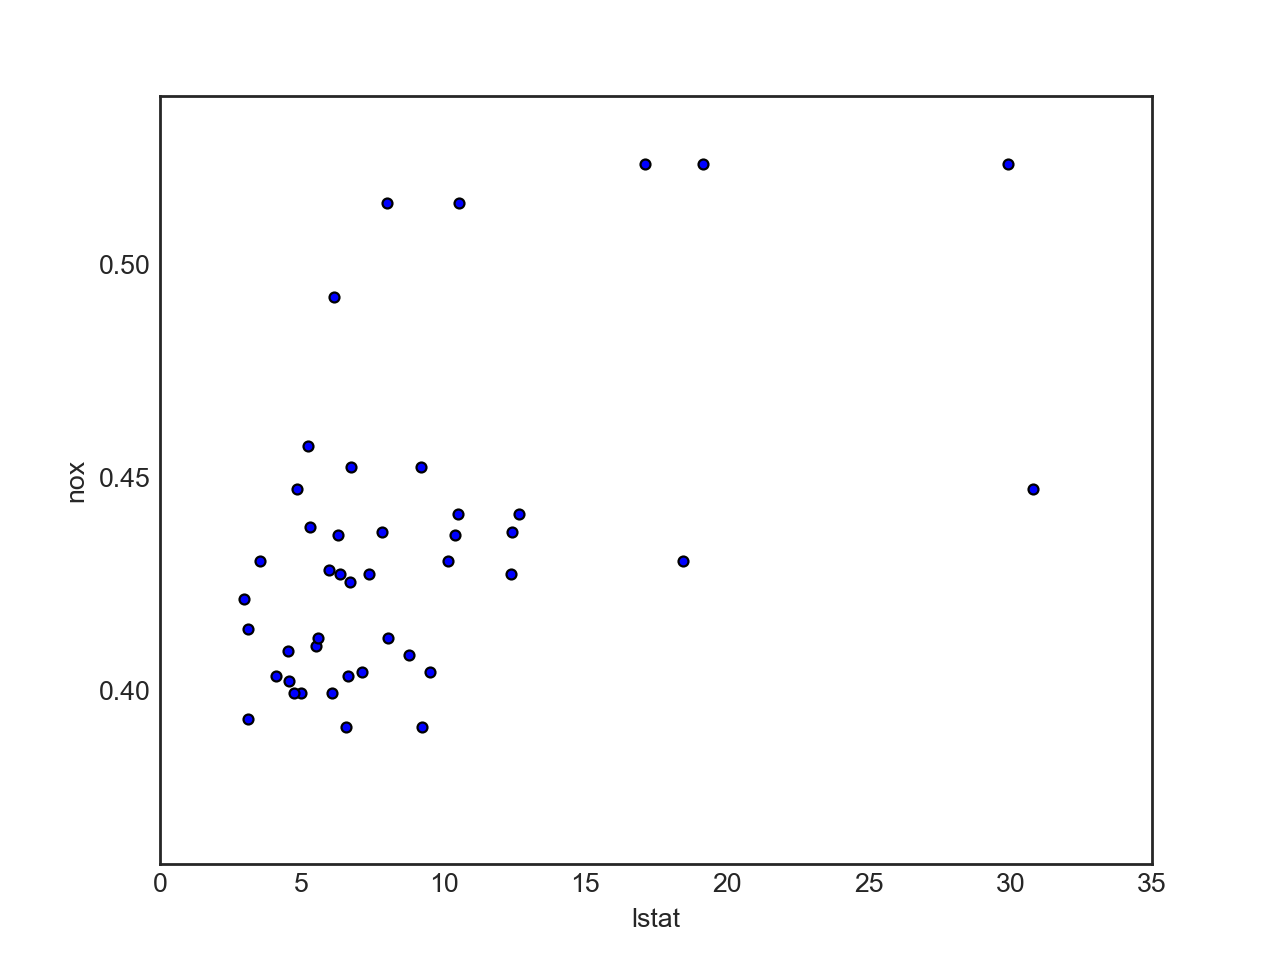

In [90]:
plt.style.use('seaborn-white')
df_far_from_employment.plot('lstat', 'nox', kind='scatter')

<IPython.core.display.Javascript object>


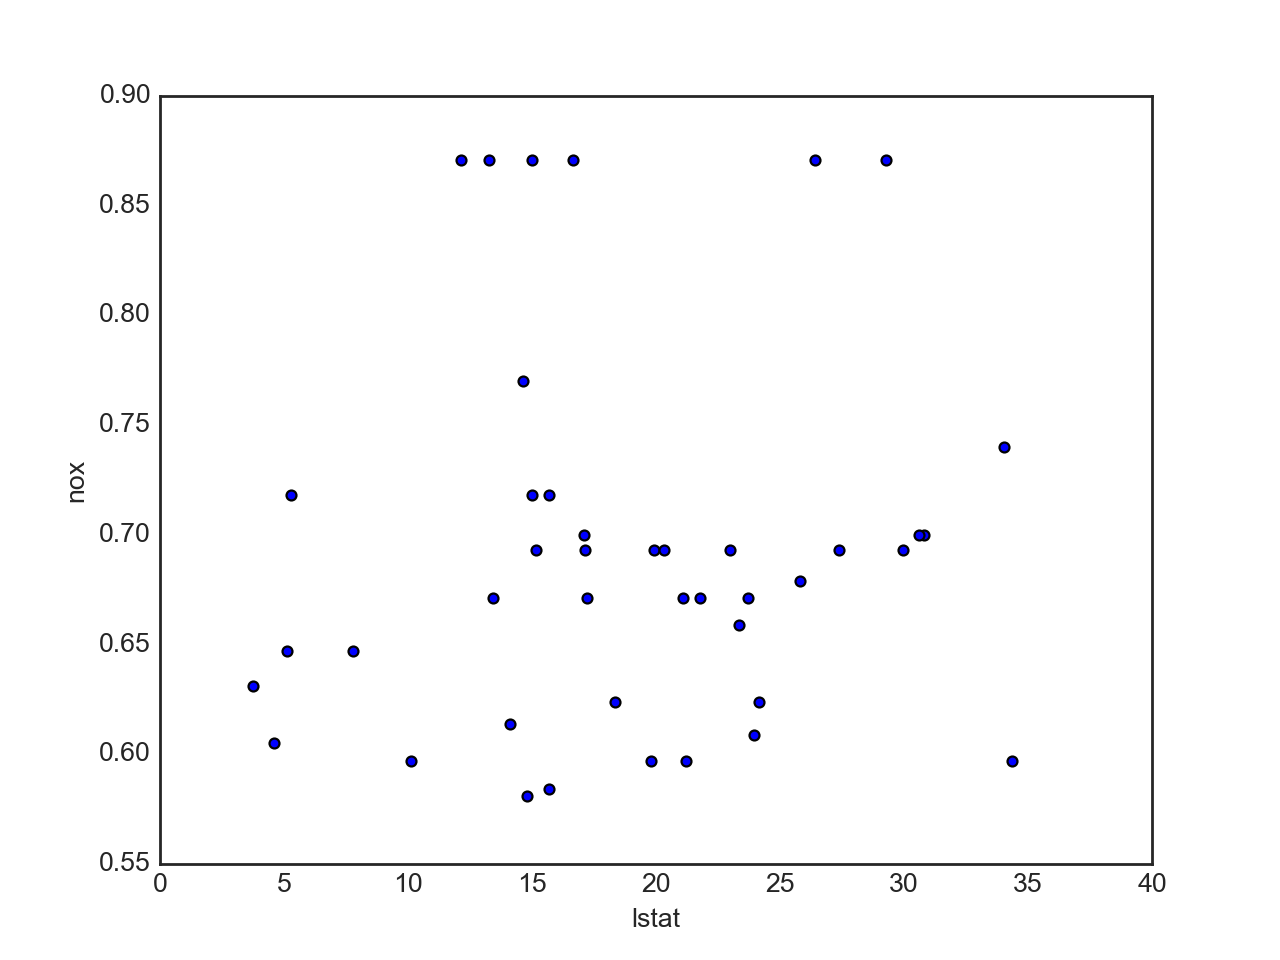

In [91]:
df_close_to_employment.plot('lstat', 'nox', kind='scatter')

It is interesting to note that there seems to be a general trend for areas with lower status to enjoy better air quality.  This is likely closely linked with proximity to employment, and access to good roads.  Prosperity likely comes at a cost of poort air quality.

### Is there a relationship between distance from employment and pupil teacher ratio?

This question will be assessed using a histogram.

<IPython.core.display.Javascript object>


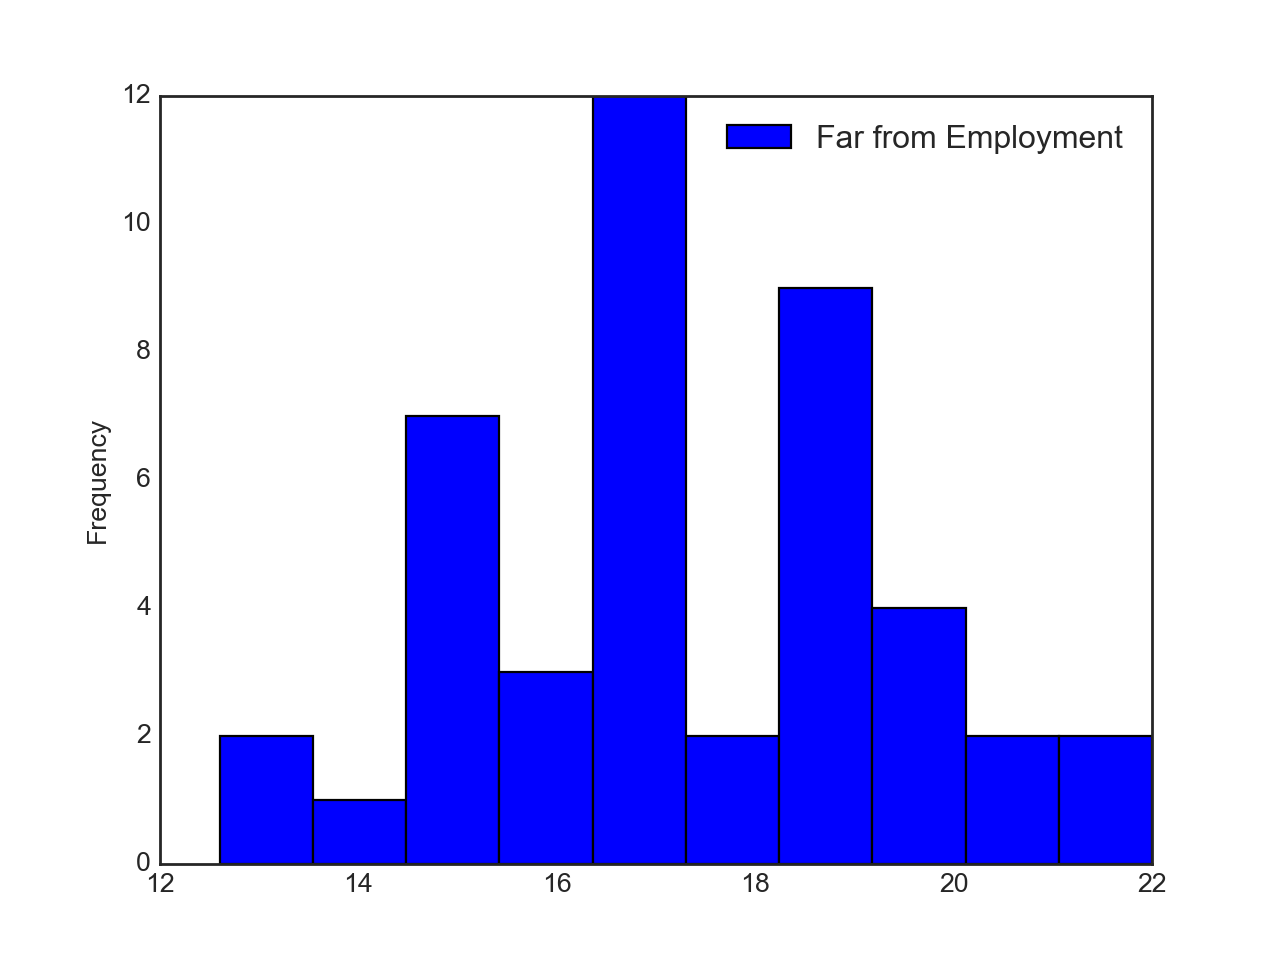

<IPython.core.display.Javascript object>


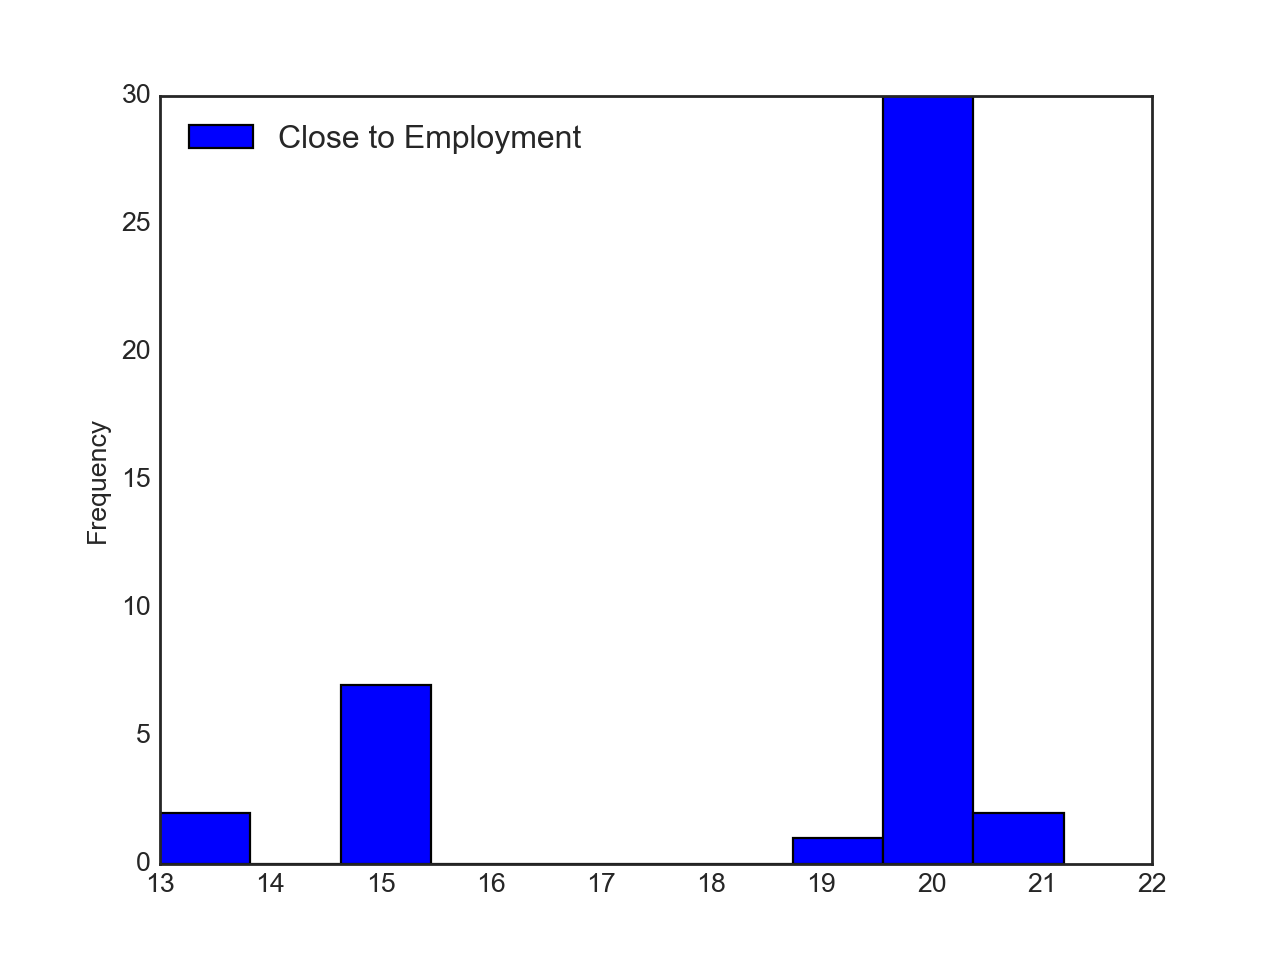

In [102]:
data = pd.DataFrame({'Far from Employment': df_far_from_employment['ptratio']})
data.plot.hist()
data2 = pd.DataFrame({'Close to Employment': df_close_to_employment['ptratio']})
data2.plot.hist()

Areas close to employment more frequently have a higher pupil teacher ratio.  This is likely due to population pressures in economically active areas.  It could also be due to public investment in less prosperous areas.  Without further investigation, no conclusions on this can be drawn.